# extract text and its position

In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter, HTMLConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO


def convert_pdf_to_txt(path1, path2, num = 0):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = HTMLConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path1, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for i, page in enumerate(PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True)):
        if num > 0 and i > num:
            break
        interpreter.process_page(page)

    text = retstr.getvalue()
    file_name = 'page' + str(num)
    f = open(path2+file_name, 'w')
    f.write(text)
    f.close()
    #text = retstr.getvalue()
    fp.close()
    device.close()
    retstr.close()




# set paths

In [2]:
#from Tkinter import *
#import tkFileDialog
from tkinter import *
import tkinter.filedialog

win = Tk()
win.title('Select the PDF file')
var = StringVar()

w = Label(win, text="File Path:")
e = Entry(win, textvariable=var)
#b = Button(win, text="Browse",command=lambda:var.set(tkFileDialog.askopenfilename()))
b = Button(win, text="Browse",command=lambda:var.set(tkinter.filedialog.askopenfilename()))
w.pack(side=LEFT)
e.pack(side=LEFT)
b.pack(side=LEFT)
win.mainloop()

path1 = var.get()

win = Tk()
win.title('Select the output file\'s direnctory')
var = StringVar()

w = Label(win, text="File Path:")
e = Entry(win, textvariable=var)
#b = Button(win, text="Browse",command=lambda:var.set(tkFileDialog.askdirectory()))
b = Button(win, text="Browse",command=lambda:var.set(tkinter.filedialog.askdirectory()))
w.pack(side=LEFT)
e.pack(side=LEFT)
b.pack(side=LEFT)
win.mainloop()

path2 = var.get()+'/'

In [3]:
#path2 = 'C:/Users/zhongzhu/Documents/GitHub/work/temp/'
#path1 = 'C:/Users/zhongzhu/Documents/GitHub/work/Seattle.pdf'
#print(path1, path2)

In [4]:
convert_pdf_to_txt(path1, path2)

KeyboardInterrupt: 

# record positions

In [5]:
import re

def record_pos(path, page=0, LINE_HEIGHT = 1, start_page=0, end_page=None):
    f = open(path+'page'+str(page), 'r')
    pages = f.read().split('#PAGE')
    f.close()
    
    contents = {}
    for page in pages[start_page: end_page]:
        page_num = page[page.find('<<<')+3:page.find('>>>')]
        page_, num = re.subn(r'<<<.*?>>>', '',page)
    
        boxes = page_.split('TEXT_BOX')

        for content in boxes:
            c = content.split(';')
            if(c[0].find('left:') > 0): #if not empty
                l = c[0][c[0].find('left:')+5:c[0].find('px')]
                t = c[1][c[1].find('top:')+4:c[1].find('px')]
                w = c[2][c[2].find('width:')+6:c[2].find('px')]
                h = c[3][c[3].find('height:')+7:c[3].find('px')]

                text = "".join(c[4:])
                #contents[text.decode('utf-8')] = [(int(l), int(t), int(w), int(h))] #whole box
                lines = text.split('\n')

                tempCount = 0
                for line in lines:
                    if re.search(r'[A-Za-z0-9,.?!]', line):
                        if not line in contents:
                            contents[line] = [(int(l), int(t)+tempCount, int(w), int(h), page_num)]
                        else:
                            contents[line].append((int(l), int(t)+tempCount, int(w), int(h), page_num))
                    tempCount += LINE_HEIGHT ### default value 1
    return contents


In [6]:
contents = record_pos(path2)
#for pos in contents:
    #print(pos)
    #print(contents[pos])

In [7]:
#import Tkinter
#import tkSimpleDialog
import tkinter
import tkinter.simpledialog

#root = Tkinter.Tk()
root = tkinter.Tk()
root.title('select sample pages')
var1 = tkinter.StringVar()
var2 = tkinter.StringVar()
#b1 = Button(root, text="Select start page",command=lambda:var1.set(tkSimpleDialog.askinteger("Select start page", "enter page number", parent = root)))
#b2 = Button(root, text="Select end page",command=lambda:var2.set(tkSimpleDialog.askinteger("Select end page", "enter page number", parent = root)))
b1 = tkinter.Button(root, text="Select start page",command=lambda:var1.set(tkinter.simpledialog.askinteger("Select start page", "enter page number", parent = root)))
b2 = tkinter.Button(root, text="Select end page",command=lambda:var2.set(tkinter.simpledialog.askinteger("Select end page", "enter page number", parent = root)))
b1.grid(column = 0, row = 0)
b2.grid(column = 1, row = 0)
#var = tkSimpleDialog.askstring("Select Pates", "enter your name", parent = root)
root.mainloop()
start_page = var1.get()
end_page = var2.get()

In [8]:
# get the positions of some sample pages
first_page_contents = record_pos(path2, start_page=int(start_page), end_page=int(end_page))

In [9]:
#for i in first_page_contents:
    #print(i)
    #print(first_page_contents[i])

In [10]:
filted_contents = {}
for text in contents:
    if len(contents[text]) > 60:  ###set at beginning#####################
        filted_contents[text] = contents[text]
        #print(text + ' ' +str(len(filted_contents[text])))

In [11]:
#from Tkinter import *
#import Tkinter as tk
import tkinter as tk

class Example(tk.Frame):
     
    def __init__(self, root, *args, **kwargs):
        tk.Frame.__init__(self, root, *args, **kwargs)
        self.root = root
        self.vsb = tk.Scrollbar(self, orient="vertical")
        self.text = tk.Text(self, width=40, height=20, yscrollcommand=self.vsb.set)
        self.vsb.config(command=self.text.yview)
        self.vsb.pack(side="right", fill="y")
        self.text.pack(side="left", fill="both", expand=True)
        
        self.temp_contents = {}

        var = []
        c = []
        for i, cat in enumerate(sorted(filted_contents)):
            c.append(cat)
            v = tk.BooleanVar()
            var.append(v)
            cb = tk.Checkbutton(self, text="#%s" % cat, variable=var[i])
            self.text.window_create("end", window=cb)
            self.text.insert("end", "\n") # to force one checkbox per line
                      
        def var_states():
            for i,v in enumerate(var):
                if v.get():
                    #print(c[i])
                    self.temp_contents[c[i]] = filted_contents[c[i]]
        tk.Button(root, text='Select', command=var_states).pack()
        
root = tk.Tk()
root.title('selecte categories')
win = Example(root)
win.pack(side="top", fill="both", expand=True)
root.mainloop()

filted_contents = win.temp_contents

# search neighbors

In [12]:
from itertools import product
neighbors = {}
    
for line1, line2 in product(filted_contents, first_page_contents):
    key = line1
    value = line2
    if not key in neighbors:
        neighbors[key] = []
    if(line1 != line2 and line1 in first_page_contents
       and abs(int(first_page_contents[line1][0][0])-int(first_page_contents[line2][0][0]))<1000    ###set at beginning
       and abs(int(first_page_contents[line1][0][1])-int(first_page_contents[line2][0][1]))<100): ###set at beginning
        neighbors[key].append(value)

In [13]:
#for key in neighbors:
    #print(key, neighbors[key])

# GUI

In [14]:
#import Tkinter as tk
#import ttk
import tkinter as tk
import tkinter.ttk

win = tk.Tk()
win.title("Set Pairs")   

#ttk.Label(win, text="Select category:").grid(column=0, row=0)   
tkinter.ttk.Label(win, text="Select category:").grid(column=0, row=0) 
#ttk.Label(win, text="content starts from").grid(column=2, row=0) 
#ttk.Label(win, text="content ends before").grid(column=3, row=0)     
pos_or_area = StringVar()
def select():  
    if pos_or_area.get() == 'area':
        ls = list(neighbors.keys())   
        ls += ['#END']
        dropdown2['values'] = ls
    else:
        ls = neighbors[category.get()]
        dropdown2['values'] = ls
    dropdown2.current()    

R1 = tkinter.ttk.Radiobutton(win, text="find by position", variable=pos_or_area, value='pos', command=select)
R1.grid(column = 2, row = 0)
R2 = tkinter.ttk.Radiobutton(win, text="find by area", variable=pos_or_area, value='area', command=select)
R2.grid(column = 3, row = 0)
    
pairs = {}
def bind():   
    #key = contents[category.get()]
    #new_value = contents[content.get()]
    key = category.get()
    if not key in pairs:
        pairs[key] = set([])
    
    if pos_or_area.get()=='pos':
        a = first_page_contents[category.get()][0]
        b = first_page_contents[content.get()][0]
        c = (b[0]-a[0], b[1]-a[1], b[2]-a[2], b[3]-a[3], b[4], pos_or_area.get())
        pairs[key].add(c)
    else:
        c = (content.get(), pos_or_area.get()) 
        pairs[key].add(c)
        
    dropdown2.current()
    
# creat a drop-down list
category = tk.StringVar()
dropdown1 = tkinter.ttk.Combobox(win, width=40, height=20, textvariable=category)
dropdown1['values'] = list(neighbors.keys())   
dropdown1.grid(column=0, row=1)      
#dropdown1.current(0)     


# create another drop-down list
content = tk.StringVar()
dropdown2 = tkinter.ttk.Combobox(win, width=40, textvariable=content)    
dropdown2.grid(column=2, row=1)  
 

# bind button
action = tkinter.ttk.Button(win, text="Bind", command=bind)
action.grid(column=4, row=1) 

win.mainloop()      # window

In [15]:
#for i in pairs:
    #print(i)
    #print(type(pairs[i]))
    #print((pairs[i]))
    #for i in pairs[i]:
        #print(len(i))

In [16]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def pdf2txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [17]:
import re

text = pdf2txt(path1)

reports = {}
pages = text.split('#PAGE')
for page in pages:
    if(len(page) == 0):
        continue
    page_num = page[page.find('<<<')+3:page.find('>>>')]
    page_, num = re.subn(r'<<<.*?>>>', '',page)
    try:
        reports[int(page_num)] = page_
    except:
        print(page)


In [18]:
def find_content_by_area(text, start, end, head='CONTRACT NUMBER'): #####
    #p = re.compile(r'{%s}.*{%s}' % (start, end))
    start = start.lstrip()
    end = end.lstrip()
    content= []
    flag = False
    #for page_num, page in sorted(reports.iteritems()):
    for page_num, page in sorted(reports.items()):
        search = []
        if flag:
            flag = False
            search = re.findall('%s.*?%s' % (head, end), page, re.DOTALL)
        elif end != 'END' and start in page and end in page:
            search = re.findall('%s.*?%s' % (start, end), page, re.DOTALL)
        else:
            search = re.findall('%s.*' % start, page, re.DOTALL)
            flag = True
        for i in search:
            i = i.replace(start, '')
            i = i.replace(end, '')
            i = i.replace('\n\n', ' ')
            #content.append('#PAGE_'+str(page_num)+' '+i)
            content.append(' ' + i)
    #print(content)
    return content

In [19]:
data = {}
for cat in pairs:
    for c in pairs[cat]:
        if c[-1] == 'area':
            content = find_content_by_area(text, cat, c[0], )
            data[cat] = content


In [20]:
def find_content_by_pos(content_map, content_pos):
    content = ''
    for c in content_map:
        m = 1 #### maximal error allowed#########################
        for pos in content_map[c]:
            error = abs(content_pos[0]-pos[0]) + abs(content_pos[1]-pos[1])
            #print error
            if error < m:
                #content += '#PAGE_'+pos[-1]+' '+c
                content += ' ' + c
    #print(m)
    return content
    
#data = {}
content_map = record_pos(path2, 0)
for cat in pairs:
    print(pairs[cat])
    #if cat in content_map:  #unnecessary??
    for pos in content_map[cat]:
        content = ''
        for shift in pairs[cat]:
            if shift[-1] == 'pos':
                content_pos = (pos[0]+shift[0], pos[1]+shift[1], pos[2]+shift[2], pos[3]+shift[3])
                content += find_content_by_pos(content_map, content_pos)
        if len(content) != 0:
            if cat in data: #unnecessary??
                data[cat].append(content)
            else:
                data[cat] = [content]
           

{(' General Comments:', 'area')}


# generate CSV table

In [28]:
#for i in data:
    #print (i)
    #for j in data[i]:
        #print (j)
#print(len(data))

In [31]:
import csv
f = open(path2+'result_py3.csv', 'w', newline = '')
writer = csv.writer(f)

for i, cat in enumerate(data):
    #if i >50:
        #break
    writer.writerow([cat] + data[cat])
    #print(i) 
    #print(cat)
f.close()

# stop words

In [21]:
ehab_stop_words = []

for word in open(r"ehabs_stop_words.txt",'r'):
    ehab_stop_words.append(word.strip())

from sklearn.feature_extraction import text 

my_stop_words = text.ENGLISH_STOP_WORDS.union(ehab_stop_words) # union the ehab's stop words and the stop words in the pachage

In [22]:
print(data.keys())

dict_keys([' Activities in Progress:'])


In [26]:
cleaned_data = {}
for key in data:
    cleaned_data[key] = []
    for t in data[key]:
        cleaned_data[key].append(' '.join(s for s in t.split() if not any(c.isdigit() for c in s)))

In [28]:
print(cleaned_data[' Activities in Progress:'])

['AAI Worked on shutting down water and removing refrigerators', 'CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind EVERGREENE MANAGEMENT Review ed tree preservation plan w ith COE, Base and Base Arborist. Some trees are missing and mislabeled. Generally okay. Several additional trees w ere added to the removal due to the condition of the trees - old split trunks, and poor conditions Should there be added costs for removal of these trees (No additional Did not finish. NE area remains. Scheduled to finish on Wednesday at am. AAI Shutting dow n w ater, and removing refrigerators', 'CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; IN Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES AAI Shutting dow n w ater and removing refrigerators', 'CONTRACT NUMBER WEATHER 

In [38]:
import sklearn
from __future__ import print_function 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer 
from sklearn import metrics 
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)
import numpy
import csv


#example = ["Machine learning is super fun",           "Python is super, super cool",           "Statistics is cool, too",    "Data science is fun",           "Python is great for machine learning",           "I like football",           "Football is great to watch"] 
for cat in cleaned_data:
    #print(cat)
    example = cleaned_data[cat]
    if len(example) == 0:
        print(cat)
        continue
    vectorizer = TfidfVectorizer(min_df = 1, stop_words = my_stop_words) 
    dtm = vectorizer.fit_transform(example) 
    lsa = TruncatedSVD(2, algorithm = 'arpack')
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

    #f = open(path2+'%s.csv' % cat[1:3], 'w', newline = '')
    f = open('%s.csv' % cat[1:5], 'w', newline = '')
    print(cat[1:5])
    writer = csv.writer(f)

    writer.writerow(['word', 'x', 'y'])
    for i, word in enumerate(vectorizer.get_feature_names()):
        writer.writerow([word, str(lsa.components_[0][i]), str(lsa.components_[1][i])])

    f.close()


#pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names ()).head(10)

Acti


In [27]:
import sklearn
from __future__ import print_function 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer 
from sklearn import metrics 
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)
import numpy

In [39]:

example = cleaned_data[' Activities in Progress:']
vectorizer = TfidfVectorizer(min_df = 1, stop_words = my_stop_words) 
dtm = vectorizer.fit_transform(example) 
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [40]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
#dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [41]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,aai,aat,ab,abatement,ac,accepted,access,accessories,accussions,acessories,...,worker,workers,working,workman,xfmer,xfmers,yard,yardage,yards,zone
component_1,0.014751,0.000885,0.000477,0.002294,0.006680,0.000914,0.003493,0.009152,0.000640,0.000745,...,0.000706,0.000073,0.001163,0.000758,0.000750,0.000351,0.015591,0.000240,0.019424,0.000637
component_2,0.020323,0.001620,0.000038,0.002808,-0.004011,-0.001181,0.000083,-0.012384,0.000161,-0.000900,...,-0.000335,0.000051,-0.001554,0.000247,-0.000739,-0.000362,-0.024856,-0.000129,-0.029335,0.000102


In [42]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2" ]).head(10)

,component_1,component_2
AAI Worked on shutting down water and removing refrigerators,0.022779,0.029967
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind EVERGREENE MANAGEMENT Review ed tree preservation plan w ith COE, Base and Base Arborist. Some trees are missing and mislabeled. Generally okay. Several additional trees w ere added to the removal due to the condition of the trees - old split trunks, and poor conditions Should there be added costs for removal of these trees (No additional Did not finish. NE area remains. Scheduled to finish on Wednesday at am. AAI Shutting dow n w ater, and removing refrigerators",0.083581,0.025151
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; IN Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES AAI Shutting dow n w ater and removing refrigerators",0.321375,0.457986
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES AAI Shutting dow n w ater and removing refrigerators",0.321375,0.457986
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES AAI Shutting dow n w ater and removing refrigerators",0.321375,0.457986
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES AAI Demolished building",0.401652,0.549462
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; IN Precipitation; MPH Wind Demolished building - crunching and hauling demolition debris.",0.171995,0.100456
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; IN Precipitation; MPH Wind Demolished garages for buildings and Worked on hauling demolition debris.",0.191134,0.094432
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; No Precipitation; MPH Wind CONTRACTORS QUALITY CONTROL REPORT (QCR) DAILY LOG OF CONSTRUCTION - MILITARY PROJECT D/B Replace Military Family Housing CONTRACTOR Evergreene Construction, L.C. QC NARRATIVES Patterson - No w ork AAI - No w ork",0.432958,0.598582
"CONTRACT NUMBER WEATHER Weather Caused No Delay Temperature Min °F, Max °F; IN Precipitation; MPH Wind AAI Demolished garage and building Crunching and heavy demo debris. Checked building for refrigerators.",0.166521,0.085312


In [43]:
xs = [w[0] for w in dtm_lsa] 
ys = [w[1] for w in dtm_lsa] 
xs, ys

([0.022778746234017686,
  0.083580698898219771,
  0.32137459299856724,
  0.32137459299856663,
  0.32137459299856724,
  0.40165185269334608,
  0.17199456341495667,
  0.19113369044416562,
  0.43295782418381595,
  0.16652071019370929,
  0.13902186971754754,
  0.28342215365975648,
  0.17978314952037319,
  0.18309190684308149,
  0.30111533184879147,
  0.26337331039718581,
  0.29263576053973223,
  0.26273609874457959,
  0.12054354682083215,
  0.13803815655461041,
  0.27796888183188961,
  0.15055201862826773,
  0.14118526326486566,
  0.2100012399115469,
  0.15800893901201396,
  0.21095456258767445,
  0.27259431876796703,
  0.17376806740843642,
  0.11673975862587377,
  0.11141002327968098,
  0.065300297182946374,
  0.13283887254207821,
  0.17887545662695481,
  0.22302103811123719,
  0.11765088931915453,
  0.24878513309512493,
  0.15629371607070894,
  0.19578874354622799,
  0.13112443078852201,
  0.1127365585076658,
  0.1779178793279885,
  0.19481673653991569,
  0.068766191635441218,
  0.272251

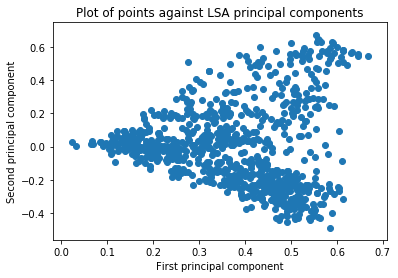

In [44]:
# Plot scatter plot of points %pylab inline 
import matplotlib.pyplot as plt 
plt.figure() 
plt.scatter(xs,ys) 
plt.xlabel('First principal component') 
plt.ylabel('Second principal component') 
plt.title('Plot of points against LSA principal components')
plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\zhongzhu\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['select', 'Button', 'text', 'var', 'f', 'Text', 'product', 'Widget', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


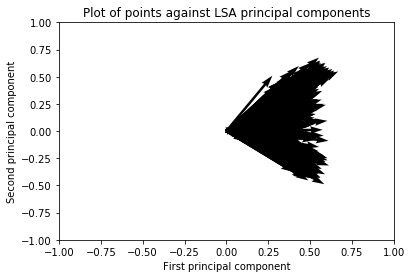

In [45]:
# Plot scatter plot of points with vectors 
%pylab inline 
import matplotlib.pyplot as plt 
plt.figure() 
ax = plt.gca() 
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
ax.set_xlim([-1,1]) 
ax.set_ylim([-1,1]) 
xlabel('First principal component') 
ylabel('Second principal component') 
title('Plot of points against LSA principal components') 
plt.draw() 
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import csv
import numpy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from time import time
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

count_vect = CountVectorizer(stop_words=my_stop_words, analyzer='word')
tfidf = TfidfVectorizer(stop_words=my_stop_words, analyzer='word') 
X_counts = {}
X_tfidf = {}
X_lsa = {}



#with open('words_counts.csv', 'w', newline = '') as f:
for i, cat in enumerate(data):
    X_counts[cat] = count_vect.fit_transform(data[cat]) # counting the words in every reports
    inv_dic = {v: k for k, v in count_vect.vocabulary_.items()}

    X_tfidf[cat]=tfidf.fit_transform(data[cat])
    #kmeans_tfidf = KMeans(n_clusters=5, init='random').fit(X_tfidf.transpose()) #clustering words


    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(2)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X_lsa[cat] = lsa.fit_transform(X_tfidf[cat])

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()

    km = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)

    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X_lsa[cat])
    print("done in %0.3fs" % (time() - t0))
    print()

    print(km.labels_)
    print(len(km.labels_))
    print()

        
        
        
        
#f.close()

Performing dimensionality reduction using LSA
done in 0.034999s
Explained variance of the SVD step: 12%

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
done in 0.004s

[4 2 2 2 2 3 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 0 2 0
 2 2 0 2 0 4 2 1 2 2 2 0 2 0 2 0 0 2 2 2 4 2 0 2 2 2 0 4 4 2 2 4 3 0 4 0 2
 2 0 1 1 1 4 4 3 2 4 1 4 0 2 0 0 0 4 3 2 4 2 0 2 1 0 1 0 4 1 1 1 1 1 1 1 2
 4 1 2 2 4 1 4 1 4 0 4 2 2 2 2 4 0 2 1 0 1 1 4 2 2 4 1 2 2 2 1 0 1 1 2 3 0
 0 1 4 0 2 1 0 1 1 3 4 1 2 1 1 4 2 2 1 1 1 2 2 4 1 1 1 4 1 3 4 0 1 0 4 0 0
 0 0 0 1 3 2 2 0 4 0 0 0 2 0 4 1 1 4 0 1 0 0 3 2 2 0 0 3 1 2 0 1 2 0 4 1 1
 1 1 0 4 1 1 1 1 3 4 4 2 0 4 1 0 4 4 1 1 2 0 4 1 1 0 0 0 0 0 1 0 0 0 1 1 1
 2 2 0 0 0 0 1 4 0 0 2 0 4 1 0 0 2 0 0 0 0 2 2 2 0 0 0 2 0 0 0 2 0 3 1 0 2
 0 0 0 3 0 2 0 0 3 0 0 2 0 0 0 1 1 0 0 0 3 1 2 0 0 1 3 0 0 0 0 1 0 4

In [94]:
for i in X_lsa:
    for j in X_lsa[i]:
        print(j)

[ 0.56487174  0.82517872]
[ 0.94945901  0.31389105]
[ 0.57610169  0.81737803]
[ 0.56673411  0.82390075]
[ 0.56855854  0.82264281]
[ 0.57977691  0.81477527]
[ 0.89308248  0.44989297]
[ 0.8883295   0.45920659]
[ 0.57473462  0.81833986]
[ 0.89257112  0.45090663]
[ 0.91753724  0.39764985]
[ 0.62069682  0.78405067]
[ 0.69344871  0.72050599]
[ 0.80821917  0.5888818 ]
[ 0.58859229  0.80843003]
[ 0.60359237  0.79729308]
[ 0.56272725  0.82664263]
[ 0.65204637  0.75817909]
[ 0.7870105   0.61693961]
[ 0.85862773  0.51259967]
[ 0.59118547  0.80653564]
[ 0.90753143  0.41998416]
[ 0.91640847  0.40024432]
[ 0.71624371  0.69785023]
[ 0.94333583  0.3318396 ]
[ 0.71938738  0.6946091 ]
[ 0.68839919  0.72533204]
[ 0.9536509  0.3009152]
[ 0.95918407  0.28278247]
[ 0.97254567  0.23271208]
[ 0.99463427  0.10345367]
[ 0.94682068  0.32176171]
[ 0.76441854  0.64472032]
[ 0.73395871  0.67919409]
[ 0.98947592  0.14469765]
[ 0.67868259  0.73443172]
[ 0.89359649  0.44887115]
[ 0.97284545  0.23145568]
[ 0.96569669  

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
import csv
import numpy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

count_vect = CountVectorizer(stop_words=my_stop_words, analyzer='word')
tfidf = TfidfVectorizer(stop_words=my_stop_words, analyzer='word') 
X_counts = {}


with open('words_tfidf.csv', 'w', newline = '') as f:
    for i, cat in enumerate(data):
        X_tfidf=tfidf.fit_transform(data[cat]) # counting the words in every reports
        inv_dic = {v: k for k, v in tfidf.vocabulary_.items()}
            
        
        kmeans_word_tfidf = KMeans(n_clusters=5, init='random').fit(X_tfidf.transpose()) #clustering words

        writer = csv.writer(f)
        tfidf_toarray = X_tfidf.transpose().toarray()
        writer.writerow([cat])
        writer.writerow(['word_number', 'word_label', 'word'])
        print(tfidf_toarray.shape) 
        for counter in range(0,len(tfidf_toarray)):
            try:
                if not re.match(r'.*[\d]+.*', inv_dic[counter]): #exclude the words containing numbers
                    tfidf_row = tfidf_toarray[counter].ravel()
                    writer.writerow(numpy.append([counter, kmeans_word_tfidf.labels_[counter], inv_dic[counter]], tfidf_row))
            except:
                print(counter)

f.close()



(2557, 1145)
(4161, 747)
(3365, 862)
(524, 497)
(1474, 270)
(1408, 391)
(3864, 860)
(1502, 555)
(3530, 869)
(104, 77)
(3227, 852)
(3661, 840)
(2031, 2027)
(884, 881)
(2032, 2027)
(2485, 1747)
(999, 881)
(1800, 1747)


In [85]:
print(inv_dic)

{2675: 'page_1', 328: 'activities', 3895: 'started', 897: 'finished', 4012: 'today', 3162: 'page_3', 624: 'contract', 1377: 'number', 688: 'daca67', 3: '02', 56: '2012', 1: '0004', 4140: 'weather', 535: 'caused', 707: 'delay', 3978: 'temperature', 1321: 'min', 83: '28', 1293: 'max', 201: '53', 3526: 'precipitation', 86: '29', 1346: 'mph', 4147: 'wind', 3560: 'progress', 856: 'evergreene', 1272: 'management', 3693: 'review', 806: 'ed', 4042: 'tree', 3540: 'preservation', 3488: 'plan', 1156: 'ith', 575: 'coe', 434: 'base', 376: 'arborist', 4043: 'trees', 1328: 'missing', 1327: 'mislabeled', 334: 'additional', 848: 'ere', 333: 'added', 3650: 'removal', 608: 'condition', 3864: 'split', 4062: 'trunks', 609: 'conditions', 649: 'costs', 896: 'finish', 1361: 'ne', 380: 'area', 3643: 'remains', 3757: 'scheduled', 4141: 'wednesday', 11: '10', 92: '30', 314: 'aai', 3813: 'shutting', 761: 'dow', 400: 'ater', 3653: 'removing', 3624: 'refrigerators', 971: 'general', 588: 'comments', 3586: 'quality',

In [77]:

for i, cat in enumerate(data):
    X_counts[cat] = count_vect.fit_transform(data[cat]) # counting the words in every reports
    inv_dic = {v: k for k, v in count_vect.vocabulary_.items()}

    for cat in X_counts:
        print(cat)
        X_tfidf=tfidf.fit_transform(data[cat])
        kmeans_word_tfidf = KMeans(n_clusters=5, init='random').fit(X_tfidf.transpose()) #clustering words

        counts_toarray = X_counts[cat].transpose().toarray()
        counter = 0
        for word_num in range(0,1799):
            if not re.match(r'.*[\d]+.*', inv_dic[counter]): #exclude the words containing numbers
                counts_row = counts_toarray[word_num].ravel()
                print(counter, kmeans_word_tfidf.labels_[counter], inv_dic[counter], counts_row)
            counter += 1
    print(X_counts[cat].shape) 


[658, 0, 'accidents'] [0 0 0 ..., 0 2 2]
[659, 4, 'activities'] [0 0 0 ..., 0 0 0]
[660, 4, 'activity'] [0 0 0 ..., 0 0 0]
[661, 4, 'add'] [0 0 0 ..., 0 0 0]
[662, 4, 'advance'] [0 0 0 ..., 0 0 0]
[663, 4, 'aldave'] [0 0 0 ..., 0 0 0]
[664, 4, 'alking'] [0 0 0 ..., 0 0 0]
[665, 4, 'alls'] [0 0 0 ..., 0 0 0]
[666, 4, 'american'] [0 0 0 ..., 0 0 0]
[667, 4, 'amp'] [0 0 0 ..., 0 0 0]
[668, 4, 'analysis'] [0 0 0 ..., 0 0 0]
[669, 4, 'appliances'] [0 0 0 ..., 0 0 0]
[670, 4, 'apprentice'] [0 0 0 ..., 0 0 0]
[671, 4, 'approval'] [0 0 0 ..., 0 0 0]
[672, 4, 'apr'] [0 0 0 ..., 0 0 0]
[673, 4, 'arauco'] [0 0 0 ..., 0 0 0]
[674, 4, 'architect'] [0 0 0 ..., 0 0 0]
[675, 4, 'area'] [0 0 0 ..., 0 0 0]
[676, 4, 'arned'] [0 0 0 ..., 0 0 0]
[677, 4, 'arts'] [0 0 0 ..., 0 0 0]
[678, 4, 'ash'] [0 0 0 ..., 0 0 0]
[679, 4, 'assistant'] [0 0 0 ..., 0 0 0]
[680, 4, 'associates'] [0 0 0 ..., 0 0 0]
[681, 4, 'ater'] [0 0 0 ..., 0 0 0]
[682, 4, 'attached'] [0 0 0 ..., 0 0 0]
[683, 4, 'attended'] [0 0 0 ..., 0 

[675, 3, 'area'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

[693, 2, 'bla'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

[698, 1, 'days'] [0 0 0 ..., 0 0 0]
[699, 1, 'debris'] [0 0 0 ..., 0 0 0]
[700, 1, 'decided'] [0 0 0 ..., 0 0 0]
[701, 1, 'decision'] [0 0 0 ..., 0 0 0]
[702, 1, 'decurdment'] [0 0 0 ..., 0 0 0]
[703, 1, 'deep'] [0 0 0 ..., 0 0 0]
[704, 1, 'deficiencies'] [0 0 0 ..., 0 0 0]
[705, 1, 'degree'] [0 0 0 ..., 0 0 0]
[706, 1, 'degrees'] [0 0 0 ..., 0 0 0]
[707, 1, 'delay'] [0 0 0 ..., 0 0 0]
[708, 1, 'delayed'] [0 0 0 ..., 0 0 0]
[709, 1, 'delaying'] [0 0 0 ..., 0 0 0]
[710, 1, 'delays'] [0 0 0 ..., 0 0 0]
[711, 1, 'delete'] [0 0 0 ..., 0 0 0]
[712, 1, 'deliver'] [0 0 0 ..., 0 0 0]
[713, 1, 'delivered'] [0 0 0 ..., 0 0 0]
[714, 1, 'delivery'] [0 0 0 ..., 0 0 0]
[715, 1, 'demo'] [0 0 0 ..., 0 0 0]
[716, 1, 'demobilization'] [0 0 0 ..., 0 0 0]
[717, 1, 'demobilize'] [0 0 0 ..., 0 0 0]
[718, 1, 'demolished'] [0 0 0 ..., 0 0 0]
[719, 1, 'demolition'] [0 0 0 ..., 0 0 0]
[720, 1, 'denied'] [0 0 0 ..., 0 0 0]
[721, 1, 'density'] [0 0 0 ..., 0 0 0]
[722, 1, 'department'] [0 0 0 ..., 0 0 0]
[723, 1, 

[1149, 1, 'issue'] [0 0 0 ..., 0 0 0]
[1150, 1, 'issued'] [0 0 0 ..., 0 0 0]
[1151, 1, 'issues'] [0 0 0 ..., 0 0 0]
[1152, 1, 'itch'] [0 0 0 ..., 0 0 0]
[1153, 1, 'itches'] [0 0 0 ..., 0 0 0]
[1154, 1, 'item'] [0 0 0 ..., 0 0 0]
[1155, 1, 'items'] [0 0 0 ..., 0 0 0]
[1156, 1, 'ith'] [0 0 0 ..., 0 0 0]
[1157, 1, 'ithout'] [0 0 0 ..., 0 0 0]
[1158, 1, 'jack'] [0 0 0 ..., 0 0 0]
[1159, 1, 'jambs'] [0 0 0 ..., 0 0 0]
[1160, 1, 'jams'] [0 0 0 ..., 0 0 0]
[1161, 1, 'jb'] [0 0 0 ..., 0 0 0]
[1162, 1, 'jim'] [0 0 0 ..., 0 0 0]
[1163, 1, 'job'] [0 0 0 ..., 0 0 0]
[1164, 1, 'joe'] [0 0 0 ..., 0 0 0]
[1165, 1, 'jogging'] [0 0 0 ..., 0 0 0]
[1166, 1, 'john'] [0 0 0 ..., 0 0 0]
[1167, 1, 'joints'] [0 0 0 ..., 0 0 0]
[1168, 1, 'joist'] [0 0 0 ..., 0 0 0]
[1169, 1, 'joists'] [0 0 0 ..., 0 0 0]
[1170, 1, 'juggy'] [0 0 0 ..., 0 0 0]
[1171, 1, 'jumps'] [0 0 0 ..., 0 0 0]
[1172, 1, 'keeping'] [0 0 0 ..., 0 0 0]
[1173, 1, 'keys'] [0 0 0 ..., 0 0 0]
[1174, 1, 'kids'] [0 0 0 ..., 0 0 0]
[1175, 1, 'kirby'] [

KeyboardInterrupt: 